In [1]:
%matplotlib inline
# coding: utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import codecs
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [2]:
def warmUpExercise():
    A = np.eye(5)
    print(A)

In [3]:
def plotData(x, y):
    plt.scatter(x, y)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    plt.show()

In [4]:
def computeCost(X, y, theta):
    m = len(y)
    J = np.sum((np.dot(X, theta).reshape(m) - y) ** 2) / (2 * m)
    return J

In [5]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    for iter in range(0, num_iters):
        theta = theta - (alpha / m) * (np.dot(X.T, (np.dot(X, theta).reshape(m) - y)).reshape(len(theta), 1))
        J_history[iter] = computeCost(X, y, theta)
    return theta, J_history

In [6]:
#==================== Part 1: Basic Function ====================
print('Running warmUpExercise ... \n')
print('5x5 Identity Matrix: \n')
warmUpExercise()

Running warmUpExercise ... 

5x5 Identity Matrix: 

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


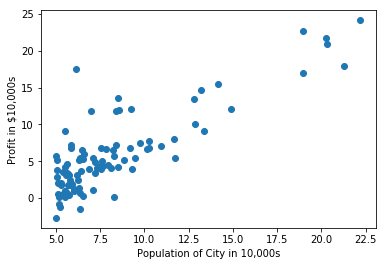

In [7]:
#======================= Part 2: Plotting =======================
data = pd.read_csv('../data/ex1data1.txt', index_col=None, header=None)
X = np.array(data[0])
y = np.array(data[1])
m = len(data)
plotData(X, y)


Testing the cost function ...

With theta = [0 ; 0]
Cost computed = 32.072734

Expected cost value (approx) 32.07


With theta = [-1 ; 2]
Cost computed = 54.242455

Expected cost value (approx) 54.24


Running Gradient Descent ...

Theta found by gradient descent:

[[-3.63029144]
 [ 1.16636235]]

Expected theta values (approx)

 -3.6303
  1.1664




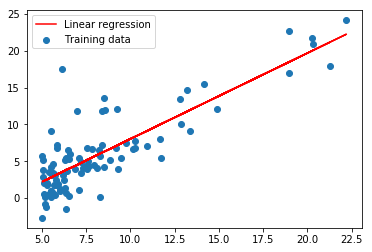

For population = 35,000, we predict a profit of 4519.767868

For population = 70,000, we predict a profit of 45342.450129



In [8]:
#=================== Part 3: Cost and Gradient descent ===================
X = np.vstack((np.ones(m, dtype='int'), X.T)).T
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01
print('\nTesting the cost function ...\n')

J = computeCost(X, y, theta)
print('With theta = [0 ; 0]\nCost computed = %f\n'%J)
print('Expected cost value (approx) 32.07\n')

J = computeCost(X, y, np.array([-1, 2]))
print('\nWith theta = [-1 ; 2]\nCost computed = %f\n'%J)
print('Expected cost value (approx) 54.24\n')

print('\nRunning Gradient Descent ...\n')
theta = gradientDescent(X, y, theta, alpha, iterations)[0]

print('Theta found by gradient descent:\n')
print('%s\n'%theta)
print('Expected theta values (approx)\n')
print(' -3.6303\n  1.1664\n\n')

plt.scatter(X[:, 1], y, label='Training data')
plt.plot(X[:, 1], np.dot(X, theta), label='Linear regression', color='red')
plt.legend()
plt.show()

predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of %f\n'%(predict1[0] * 10000))
predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of %f\n'%(predict2[0] * 10000))

Visualizing J(theta_0, theta_1) ...



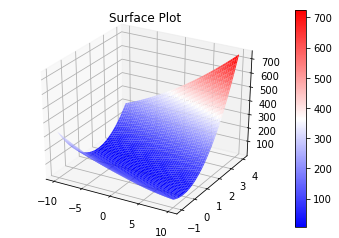

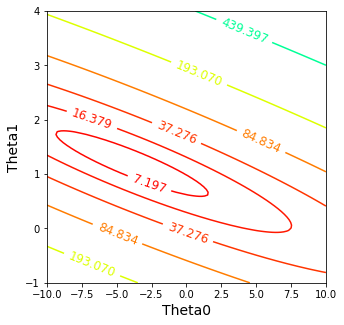

In [9]:
#============= Part 4: Visualizing J(theta_0, theta_1) =============
print('Visualizing J(theta_0, theta_1) ...\n')
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i  in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = computeCost(X, y, t)
J_vals = J_vals.T

#Surface plot
X1, X2 = np.meshgrid(theta0_vals, theta1_vals)
X = np.c_[np.ravel(X1), np.ravel(X2)]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, J_vals, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_title('Surface Plot')
fig.show()

#Contour plot
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.set_xlabel('Theta0', size=14)
ax.set_ylabel('Theta1', size=14)
ax.set_xlim(-10, 10)
ax.set_ylim(-1, 4)
X, Y = np.meshgrid(theta0_vals, theta1_vals)
h = np.logspace(-2, 3, 15, base=10)
ct = ax.contour(X, Y, J_vals, cmap="hsv", levels=h)
ax.clabel(ct, fontsize=12)
plt.show()